In [1]:
import warnings

import cv2
import numpy as np
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
from glob import iglob
from scipy.spatial.distance import cityblock, cosine

from machine_learning.decomposition import PCA, ICA, LDA

import sklearn.decomposition
import sklearn.discriminant_analysis

In [2]:
warnings.filterwarnings('ignore')
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [3]:
def center(X):
    return X - np.mean(X, axis=0)

def standardize(X):
    return X / np.std(X, axis=0)

In [4]:
# Read image files
def read_images(directory_name):
    X = []; y = []
    for image in iglob("data/" + directory_name + "/*.pgm"):
        face = cv2.resize(plt.imread(image), (50, 60)).flatten()
        X = np.append(X, face)
        y = np.append(y, image.split("/")[2][:5]) # Select the substring in the name that contains the class
    X = np.reshape(X, (-1, 3000))
    return X, y

In [5]:
X, y = read_images("training_set")
Xt = np.transpose(X) # input data for ICA1
X = center(X); X = standardize(X)
Xt = center(Xt); Xt = standardize(Xt)

In [6]:
pca = PCA(n_components=400)
pca.fit(X)

In [7]:
print("The cumulative variance of the first 400 components is " + str(round(pca.explained_variance, 2)) + "%")

The cumulative variance of the first 400 components is 99.91%


In [8]:
pcat = PCA(n_components=400)
pcat.fit(Xt)

In [9]:
ica1 = ICA(n_components=400)
ica1.fit(np.dot(Xt, pcat.components))

In [10]:
ica2 = ICA(n_components=400)
ica2.fit(np.dot(X, pca.components))

In [11]:
lda = LDA(n_components=400)
lda.fit(np.dot(X, pca.components), y)

In [19]:
%timeit pca.fit(X)
%timeit sklearn.decomposition.PCA(n_components=400).fit(X)

613 ms ± 11.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
655 ms ± 13.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
%timeit ica2.fit(np.dot(X, pca.components))
%timeit sklearn.decomposition.FastICA(n_components=400).fit(np.dot(X, pca.components))

315 ms ± 12.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
7.94 s ± 772 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
%timeit lda.fit(np.dot(X, pca.components), y)
%timeit sklearn.discriminant_analysis.LinearDiscriminantAnalysis(n_components=400).fit(np.dot(X, pca.components), y)

1.35 s ± 58.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
296 ms ± 7.51 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
PC = pca.components
IC1 = np.dot(ica1.components, np.transpose(PC))
IC2 = np.dot(ica2.components, np.transpose(PC))
LD = np.dot(lda.components, np.transpose(PC))

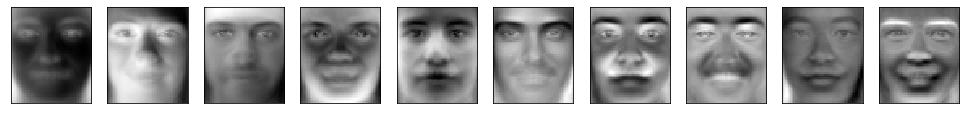

In [14]:
PC_ = np.transpose(PC) # for vizualization
fig, axes = plt.subplots(1, 10, figsize=(17, 3), subplot_kw={"xticks":[], "yticks":[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(PC_[i].reshape(60, 50), cmap="gray")

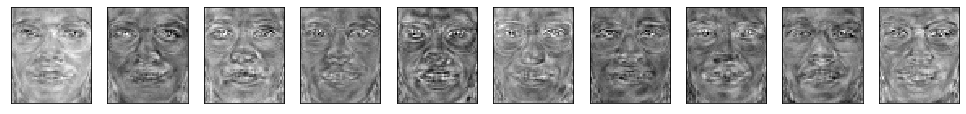

In [15]:
IC1_ = np.dot(ica1.components, np.dot(np.transpose(pcat.components), X)) # for vizualization
fig, axes = plt.subplots(1, 10, figsize=(17, 3), subplot_kw={"xticks":[], "yticks":[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(IC1_[i].reshape(60, 50), cmap="gray")

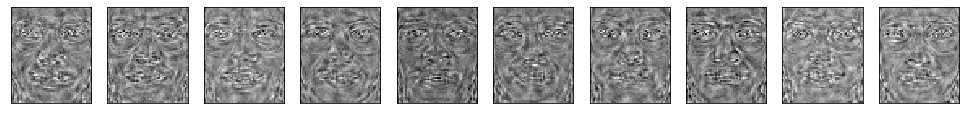

In [16]:
fig, axes = plt.subplots(1, 10, figsize=(17, 3), subplot_kw={"xticks":[], "yticks":[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(IC2[i].reshape(60, 50), cmap="gray")

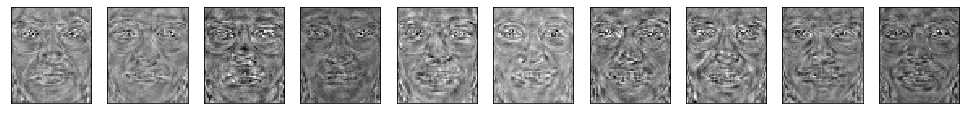

In [17]:
fig, axes = plt.subplots(1, 10, figsize=(17, 3), subplot_kw={"xticks":[], "yticks":[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(LD[i].reshape(60, 50), cmap="gray")

In [13]:
Xg, yg = read_images("gallery")
Xg = center(Xg); Xg = standardize(Xg)
Xg_pca = np.dot(Xg, PC)
Xg_ica1 = np.dot(Xg, np.transpose(IC1))
Xg_ica2 = np.dot(Xg, np.transpose(IC2))
Xg_lda = np.dot(Xg, np.transpose(LD))

In [14]:
Xfb, yfb = read_images("fb")
Xfb = center(Xfb); Xfb = standardize(Xfb)
Xfb_pca = np.dot(Xfb, PC)
Xfb_ica1 = np.dot(Xfb, np.transpose(IC1))
Xfb_ica2 = np.dot(Xfb, np.transpose(IC2))
Xfb_lda = np.dot(Xfb, np.transpose(LD))

In [15]:
Xfc, yfc = read_images("fc")
Xfc = center(Xfc); Xfc = standardize(Xfc)
Xfc_pca = np.dot(Xfc, PC)
Xfc_ica1 = np.dot(Xfc, np.transpose(IC1))
Xfc_ica2 = np.dot(Xfc, np.transpose(IC2))
Xfc_lda = np.dot(Xfc, np.transpose(LD))

In [16]:
Xd1, yd1 = read_images("dup1")
Xd1 = center(Xd1); Xd1 = standardize(Xd1)
Xd1_pca = np.dot(Xd1, PC)
Xd1_ica1 = np.dot(Xd1, np.transpose(IC1))
Xd1_ica2 = np.dot(Xd1, np.transpose(IC2))
Xd1_lda = np.dot(Xd1, np.transpose(LD))

In [17]:
Xd2, yd2 = read_images("dup2")
Xd2 = center(Xd2); Xd2 = standardize(Xd2)
Xd2_pca = np.dot(Xd2, PC)
Xd2_ica1 = np.dot(Xd2, np.transpose(IC1))
Xd2_ica2 = np.dot(Xd2, np.transpose(IC2))
Xd2_lda = np.dot(Xd2, np.transpose(LD))

In [18]:
# Faster than SciPy's Manhattan
def euclidean(a, b):
    return np.linalg.norm(a - b)

In [19]:
def performance(rank, knn_, X, y):
    true = 0; total = len(X)
    for i in range(total):
        if y[i] in knn_.find_knn(rank, X[i]):
            true += 1
    return round(true / total*100, 2)

In [20]:
# PCA kNN
pca_l1 = knn.kNN(Xg_pca, yg, cityblock, 100)
pca_l2 = knn.kNN(Xg_pca, yg, euclidean, 100)
pca_cos = knn.kNN(Xg_pca, yg, cosine, 100)

In [21]:
# ICA1 kNN
ica1_l1 = knn.kNN(Xg_ica1, yg, cityblock, 100)
ica1_l2 = knn.kNN(Xg_ica1, yg, euclidean, 100)
ica1_cos = knn.kNN(Xg_ica1, yg, cosine, 100)

In [22]:
# ICA2 kNN
ica2_l1 = knn.kNN(Xg_ica2, yg, cityblock, 100)
ica2_l2 = knn.kNN(Xg_ica2, yg, euclidean, 100)
ica2_cos = knn.kNN(Xg_ica2, yg, cosine, 100)

In [23]:
# LDA kNN
lda_l1 = knn.kNN(Xg_lda, yg, cityblock, 100)
lda_l2 = knn.kNN(Xg_lda, yg, euclidean, 100)
lda_cos = knn.kNN(Xg_lda, yg, cosine, 100)

# Fb probe set

In [24]:
print("PCA+L1: " + str(performance(1, pca_l1, Xfb_pca, yfb)))
print("PCA+L2: " + str(performance(1, pca_l2, Xfb_pca, yfb)))
print("PCA+COS: " + str(performance(1, pca_cos, Xfb_pca, yfb)))

PCA+L1: 72.72
PCA+L2: 66.19
PCA+COS: 69.29


In [25]:
print("ICA1+L1: " + str(performance(1, ica1_l1, Xfb_ica1, yfb)))
print("ICA1+L2: " + str(performance(1, ica1_l2, Xfb_ica1, yfb)))
print("ICA1+COS: " + str(performance(1, ica1_cos, Xfb_ica1, yfb)))

ICA1+L1: 47.7
ICA1+L2: 47.78
ICA1+COS: 77.15


In [26]:
print("ICA2+L1: " + str(performance(1, ica2_l1, Xfb_ica2, yfb)))
print("ICA2+L2: " + str(performance(1, ica2_l2, Xfb_ica2, yfb)))
print("ICA2+COS: " + str(performance(1, ica2_cos, Xfb_ica2, yfb)))

ICA2+L1: 42.68
ICA2+L2: 46.44
ICA2+COS: 76.82


In [27]:
print("LCA+L1: " + str(performance(1, lda_l1, Xfb_lda, yfb)))
print("LCA+L2: " + str(performance(1, lda_l2, Xfb_lda, yfb)))
print("LCA+COS: " + str(performance(1, lda_cos, Xfb_lda, yfb)))

LCA+L1: 78.16
LCA+L2: 66.19
LCA+COS: 69.29


# Fc probe set

In [28]:
print("PCA+L1: " + str(performance(1, pca_l1, Xfc_pca, yfc)))
print("PCA+L2: " + str(performance(1, pca_l2, Xfc_pca, yfc)))
print("PCA+COS: " + str(performance(1, pca_cos, Xfc_pca, yfc)))

PCA+L1: 66.49
PCA+L2: 30.93
PCA+COS: 38.66


In [29]:
print("ICA1+L1: " + str(performance(1, ica1_l1, Xfc_ica1, yfc)))
print("ICA1+L2: " + str(performance(1, ica1_l2, Xfc_ica1, yfc)))
print("ICA1+COS: " + str(performance(1, ica1_cos, Xfc_ica1, yfc)))

ICA1+L1: 46.39
ICA1+L2: 46.91
ICA1+COS: 72.68


In [30]:
print("ICA2+L1: " + str(performance(1, ica2_l1, Xfc_ica2, yfc)))
print("ICA2+L2: " + str(performance(1, ica2_l2, Xfc_ica2, yfc)))
print("ICA2+COS: " + str(performance(1, ica2_cos, Xfc_ica2, yfc)))

ICA2+L1: 37.11
ICA2+L2: 46.39
ICA2+COS: 70.62


In [31]:
print("LDA+L1: " + str(performance(1, lda_l1, Xfc_lda, yfc)))
print("LDA+L2: " + str(performance(1, lda_l2, Xfc_lda, yfc)))
print("LDA+COS: " + str(performance(1, lda_cos, Xfc_lda, yfc)))

LDA+L1: 71.65
LDA+L2: 30.93
LDA+COS: 38.66


# DUP1 probe set

In [32]:
print("PCA+L1: " + str(performance(1, pca_l1, Xd1_pca, yd1)))
print("PCA+L2: " + str(performance(1, pca_l2, Xd1_pca, yd1)))
print("PCA+COS: " + str(performance(1, pca_cos, Xd1_pca, yd1)))

PCA+L1: 30.89
PCA+L2: 20.64
PCA+COS: 23.82


In [33]:
print("ICA1+L1: " + str(performance(1, ica1_l1, Xd1_ica1, yd1)))
print("ICA1+L2: " + str(performance(1, ica1_l2, Xd1_ica1, yd1)))
print("ICA1+COS: " + str(performance(1, ica1_cos, Xd1_ica1, yd1)))

ICA1+L1: 14.82
ICA1+L2: 15.51
ICA1+COS: 38.09


In [34]:
print("ICA2+L1: " + str(performance(1, ica2_l1, Xd1_ica2, yd1)))
print("ICA2+L2: " + str(performance(1, ica2_l2, Xd1_ica2, yd1)))
print("ICA2+COS: " + str(performance(1, ica2_cos, Xd1_ica2, yd1)))

ICA2+L1: 10.53
ICA2+L2: 14.4
ICA2+COS: 38.64


In [35]:
print("LDA+L1: " + str(performance(1, lda_l1, Xd1_lda, yd1)))
print("LDA+L2: " + str(performance(1, lda_l2, Xd1_lda, yd1)))
print("LDA+COS: " + str(performance(1, lda_cos, Xd1_lda, yd1)))

LDA+L1: 38.64
LDA+L2: 20.64
LDA+COS: 23.96


# DUP2 probe set

In [36]:
print("PCA+L1: " + str(performance(1, pca_l1, Xd2_pca, yd2)))
print("PCA+L2: " + str(performance(1, pca_l2, Xd2_pca, yd2)))
print("PCA+COS: " + str(performance(1, pca_cos, Xd2_pca, yd2)))

PCA+L1: 19.23
PCA+L2: 10.68
PCA+COS: 14.53


In [37]:
print("ICA1+L1: " + str(performance(1, ica1_l1, Xd2_ica1, yd2)))
print("ICA1+L2: " + str(performance(1, ica1_l2, Xd2_ica1, yd2)))
print("ICA1+COS: " + str(performance(1, ica1_cos, Xd2_ica1, yd2)))

ICA1+L1: 8.55
ICA1+L2: 8.97
ICA1+COS: 33.76


In [38]:
print("ICA2+L1: " + str(performance(1, ica2_l1, Xd2_ica2, yd2)))
print("ICA2+L2: " + str(performance(1, ica2_l2, Xd2_ica2, yd2)))
print("ICA2+COS: " + str(performance(1, ica2_cos, Xd2_ica2, yd2)))

ICA2+L1: 6.84
ICA2+L2: 8.55
ICA2+COS: 33.76


In [39]:
print("LDA+L1: " + str(performance(1, lda_l1, Xd2_lda, yd2)))
print("LDA+L2: " + str(performance(1, lda_l2, Xd2_lda, yd2)))
print("LDA+COS: " + str(performance(1, lda_cos, Xd2_lda, yd2)))

LDA+L1: 23.08
LDA+L2: 10.68
LDA+COS: 14.53


# CMS curves

In [59]:
# Create a CSM plot
def CSM(nn, X, y):
    csm = []
    csm.append(performance(1, nn, X, y))
    for rank in range(5, 81, 5):
        csm.append(performance(rank, nn, X, y))
    return csm

In [ ]:
CMS_fb = pd.DataFrame()
CMS_fb["PCA_L1"] = CSM(pca_l1, Xfb_pca, yfb)
CMS_fb["PCA_L2"] = CSM(pca_l2, Xfb_pca, yfb)
CMS_fb["PCA_COS"] = CSM(pca_cos, Xfb_pca, yfb)

In [ ]:
CMS_fb = CMS_fb.reset_index().rename(columns={'index':'rank'})
CMS_fb['rank'] *= 5
CMS_fb.at[0, 'rank'] = 1

In [ ]:
CMS_fb = pd.melt(CMS_fb, id_vars=['rank'], value_vars=['PCA_L1', 'PCA_L2', 'PCA_COS', 'PCA_MAH']).rename(columns={'variable': 'algorithm'})

alt.Chart(CMS_fb).mark_line().encode(
    alt.X('rank:Q'),
    alt.Y('value:Q', scale=alt.Scale(domain=(55, 100))),
    alt.Color('algorithm:N'),
    alt.Shape('algorithm:N'),
    alt.Tooltip('value:Q')
).interactive()